<a href="https://colab.research.google.com/github/jear2412/MetodosLineales/blob/master/IntervalosConfianzaMedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Intervalos de confianza para a'mu
# t, T2 simultaneos, Bonferroni,  TCL simultaneos


import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="darkgrid") 

In [2]:
#------- Inferencia sobre \mu


#Ejemplo: Microondas

rad=pd.read_csv( 'rad.csv',sep=',' )



In [3]:
print(rad)

    radclosed  radopened
0        0.15       0.30
1        0.09       0.09
2        0.18       0.30
3        0.10       0.10
4        0.05       0.10
5        0.12       0.12
6        0.08       0.09
7        0.05       0.10
8        0.08       0.09
9        0.10       0.10
10       0.07       0.07
11       0.02       0.05
12       0.01       0.01
13       0.10       0.45
14       0.10       0.12
15       0.10       0.20
16       0.02       0.04
17       0.10       0.10
18       0.01       0.01
19       0.40       0.60
20       0.10       0.12
21       0.05       0.10
22       0.03       0.05
23       0.05       0.05
24       0.15       0.15
25       0.10       0.30
26       0.15       0.15
27       0.09       0.09
28       0.08       0.09
29       0.18       0.28
30       0.10       0.10
31       0.20       0.10
32       0.11       0.10
33       0.30       0.30
34       0.02       0.12
35       0.20       0.25
36       0.20       0.20
37       0.30       0.40
38       0.30       0.33


In [4]:
rad.describe()

,radclosed,radopened
count,42.000000,42.00000
mean,0.128333,0.16381
std,0.100266,0.12724
min,0.010000,0.01000
25%,0.055000,0.09000
50%,0.100000,0.11000
75%,0.172500,0.23750
max,0.400000,0.60000


Text(0, 0.5, 'Radiacion abierta')

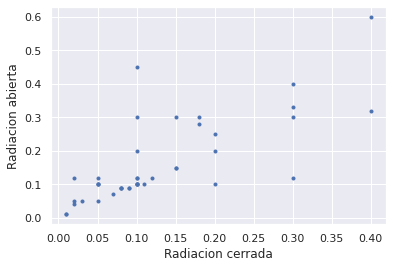

In [8]:
plt.plot( rad['radclosed'], rad['radopened'], '.'   )
plt.xlabel('Radiacion cerrada')
plt.ylabel('Radiacion abierta')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


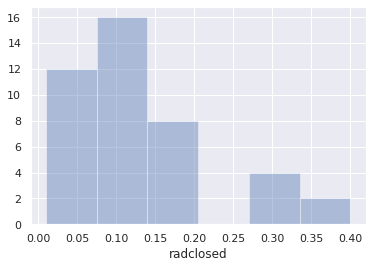

In [10]:
sns.distplot(rad['radclosed'] , kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


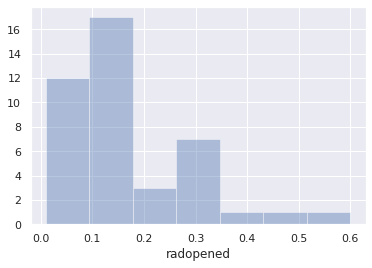

In [11]:
sns.distplot(rad['radopened'] , kde=False)

In [12]:
# Matriz de Diseno
radclosed= rad.iloc[:,0] #extraemos columna 0
radopened= rad.iloc[:,1] #extraemos columna 1

radclosed=radclosed.to_numpy() #pasar a numpy
radopened=radopened.to_numpy()

tradclosed= radclosed**(1/4) #transformacion sugerida por el libro
tradopened= radopened**(1/4)

X=np.array( [ tradclosed, tradopened ]  ) #matriz de diseno
X=np.transpose(X)


In [14]:
X.shape #dimensiones de la matriz de diseno n=42, p=6

(42, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


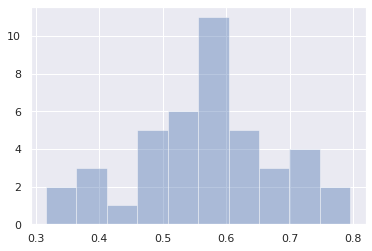

In [19]:
sns.distplot( X[:,0] , kde=False, bins=10)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


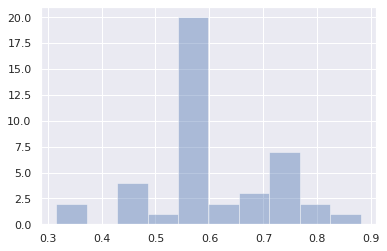

In [20]:
sns.distplot( X[:,1] , kde=False, bins=10)

In [22]:
#Maxima Verosimilitud


def MLE(X):
  n=X.shape[0]
  sumx=np.zeros( X.shape[1] )
  for i in range(n):
    sumx=sumx+X[i]

  xbar=1/n*sumx
  
  outersum=np.zeros( (X.shape[1],X.shape[1]) )
  for i in range(n):
    outersum= outersum+np.outer(X[i] -xbar  , X[i] - xbar)

  #S=1/n * outersim # MLE
  S=1/(n-1)*outersum # Usaremos el insesgado por que los IC usan esta cantidad

  return xbar, S

  




In [24]:
xbar, S= MLE(X)
print('Media empirica: ', xbar)

print('Covarianza Empirica:\n', S)




Media empirica:  [0.56425751 0.60298124]
Covarianza Empirica:
 [[0.01435023 0.01171547]
 [0.01171547 0.0145453 ]]


In [25]:
#--------
  
# a'xbarra +-  c \sqrt{ a'Sa/n }
# el valor de c cambia para los diferentes tipos de IC

#------- IC one at a time (uno a la vez) t student

def ICt(alpha, a , X):
  n=X.shape[0]
  p=X.shape[1]
  xbar, S= MLE(X)
  d= np.sqrt(np.dot( a, S@a/n     ))
  t=scipy.stats.t.ppf(1-alpha/2, df=n-1)
  
  L= np.dot(a, xbar)-d*t
  U= np.dot(a, xbar)+d*t
  return L,U




In [26]:
#------ IC sim
def ICsim(alpha,a, X):
  n=X.shape[0]
  p=X.shape[1]
  xbar, S= MLE(X)
  
  c=np.sqrt( p*(n-1)/(n*(n-p)) )
  d=np.sqrt(np.dot( a, S@a     ))
  F=np.sqrt( scipy.stats.f.ppf(1-alpha, p , n-p, loc=0, scale=1))
  
  L= np.dot(a, xbar)-c*d*F
  U= np.dot(a, xbar)+c*d*F
  return L,U



In [32]:
#------ IC TCL
def ICtcl(alpha, a , X):
  n=X.shape[0]
  p=X.shape[1]
  xbar, S= MLE(X)
  d=np.sqrt(np.dot( a, S@a/n     ))
  t=np.sqrt(  scipy.stats.chi2.ppf(1-alpha, df=p) )
  
  L= np.dot(a, xbar)-d*t
  U= np.dot(a, xbar)+d*t
  return L,U


In [33]:
#----- mu1

a=np.array( [1,0] )

print( 'One at a time: ', ICt( 0.05, a, X))
print( 'T2: ', ICsim( 0.05, a, X))
print( 'Chi2: ', ICtcl( 0.05, a, X))


One at a time:  (0.5269275499961095, 0.6015874689643377)
T2:  (0.5166802836572519, 0.6118347353031952)
Chi2:  (0.5190124306993124, 0.6095025882611348)


In [34]:
#----- mu2

a=np.array( [0,1] )

print( 'One at a time: ', ICt( 0.05, a, X))
print( 'T2: ', ICsim( 0.05, a, X))
print( 'Chi2: ', ICtcl( 0.05, a, X))

One at a time:  (0.5653984210481428, 0.6405640582672373)
T2:  (0.5550817435756988, 0.6508807357396812)
Chi2:  (0.5574296877059315, 0.6485327916094485)


In [35]:
# Las medias son iguales mu1=mu2?
# mu1-mu2=0

a=np.array([1,-1]) #ic para la diferencia

print( 'One at a time: ', ICt( 0.05, a, X))
print( 'T2: ', ICsim( 0.05, a, X))
print( 'Chi2: ', ICtcl( 0.05, a, X)) 



One at a time:  (-0.06175974326182242, -0.01568771709311047)
T2:  (-0.0680832476192611, -0.009364212735671788)
Chi2:  (-0.06664409872871895, -0.010803361626213943)


In [39]:
mu1ICs=np.zeros((3,2))
mu2ICs=np.zeros((3,2))
#--- mu1
a=[1,0]
mu1ICs[0]=ICt( 0.05, a, X)
mu1ICs[1]=ICsim( 0.05, a, X)
mu1ICs[2]=ICtcl( 0.05, a, X)

#--- mu1
a=[0,1]
mu2ICs[0]=ICt( 0.05, a, X)
mu2ICs[1]=ICsim( 0.05, a, X)
mu2ICs[2]=ICtcl( 0.05, a, X)


In [40]:
mu1ICs

array([[0.52692755, 0.60158747],
       [0.51668028, 0.61183474],
       [0.51901243, 0.60950259]])

In [41]:
mu2ICs

array([[0.56539842, 0.64056406],
       [0.55508174, 0.65088074],
       [0.55742969, 0.64853279]])

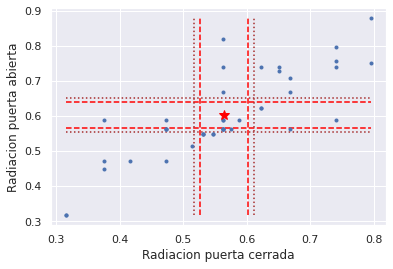

In [49]:
plt.plot( X[:,0], X[:,1], '.'   )
plt.xlabel( 'Radiacion puerta cerrada' )
plt.ylabel( 'Radiacion puerta abierta' )
plt.plot(  xbar[0], xbar[1], '*' , markersize=10, color='red')

#IC t
plt.hlines( mu2ICs[0,0] , xmin= np.min( X[:,0] ) ,  xmax= np.max( X[:,0] ), color='red' , linestyles='dashed' )
plt.hlines( mu2ICs[0,1] , xmin= np.min( X[:,0] ) , xmax= np.max( X[:,0] ),color='red', linestyles='dashed')
plt.vlines( mu1ICs[0,0] , ymin= np.min( X[:,1] ) , ymax= np.max( X[:,1] ),color='red', linestyles='dashed')
plt.vlines( mu1ICs[0,1] , ymin= np.min( X[:,1] ) , ymax= np.max( X[:,1] ), color='red', linestyles='dashed')

#IC sim
plt.hlines( mu2ICs[1,0] , xmin= np.min( X[:,0] ) , xmax= np.max( X[:,0] ),color='brown', linestyles='dotted'  )
plt.hlines( mu2ICs[1,1] , xmin= np.min( X[:,0] ) , xmax= np.max( X[:,0] ),color='brown', linestyles='dotted'  )
plt.vlines( mu1ICs[1,0] , ymin= np.min( X[:,1] ) , ymax= np.max( X[:,1] ),color='brown', linestyles='dotted'  )
plt.vlines( mu1ICs[1,1] , ymin= np.min( X[:,1] ) , ymax= np.max( X[:,1] ),color='brown', linestyles='dotted'  )


In [50]:
#------- 5.9


n=61
p=6

xbar=np.array( [95.52, 164.38, 55.69, 93.39, 17.98, 31.13]  )

S=np.array([ 
  [3266.46, 1343.97, 731.54, 1175.50, 162.68, 238.37],           
  [1343.46, 721.91, 324.25, 537.35, 80.17, 117.73 ],
  [ 731.54, 324.25, 179.28, 281.17, 39.15, 56.80  ],
  [1175, 537.35, 281.17, 474.98, 63.73, 94.85 ],
  [161.68, 80.17, 39.15, 63.73, 9.95, 13.88],
  [239.37, 117.73, 56.80, 94.85, 13.88, 21.26]
])

print('Media: ', xbar)
print('S: \n', S)


Media:  [ 95.52 164.38  55.69  93.39  17.98  31.13]
S: 
 [[3266.46 1343.97  731.54 1175.5   162.68  238.37]
 [1343.46  721.91  324.25  537.35   80.17  117.73]
 [ 731.54  324.25  179.28  281.17   39.15   56.8 ]
 [1175.    537.35  281.17  474.98   63.73   94.85]
 [ 161.68   80.17   39.15   63.73    9.95   13.88]
 [ 239.37  117.73   56.8    94.85   13.88   21.26]]


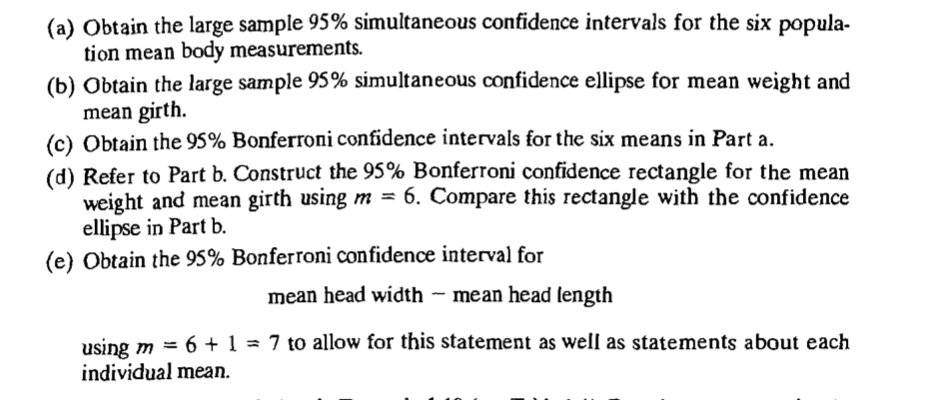

In [53]:
n=61
p=6
#--- a) IC simultaneos 

def ICsim(alpha,a, xbar, S):
  c=np.sqrt( p*(n-1)/(n*(n-p)) )
  d=np.sqrt(np.dot( a, S@a     ))
  F=np.sqrt( scipy.stats.f.ppf(alpha, p , n-p, loc=0, scale=1))
  L= np.dot(a, xbar)-c*d*F
  U= np.dot(a, xbar)+c*d*F
  return L,U

def ICt(alpha, a , xbar, S):
  d=np.sqrt(np.dot( a, S@a /n    ))
  t=scipy.stats.t.ppf(1-alpha/2, df=n-1)
  L= np.dot(a, xbar)-d*t
  U= np.dot(a, xbar)+d*t
  return L,U

def ICtcl(alpha, a , xbar, S):
  d=np.sqrt(np.dot( a, S@a/n     ))
  t=np.sqrt(  scipy.stats.chi2.ppf(1-alpha, df=p) )
  
  L= np.dot(a, xbar)-d*t
  U= np.dot(a, xbar)+d*t
  return L,U



In [63]:

# Muestras grandes 
temptcl=np.zeros( (p,2) )
for i in range(p):
  a=np.zeros(p)
  a[i]=1
  temptcl[i]=ICtcl(0.05, a, xbar, S)

print('IC Muestra grande simultaneos:\n ', temptcl)  



IC Muestra grande simultaneos:
  [[ 69.5534654  121.4865346 ]
 [152.17277777 176.58722223]
 [ 49.60667185  61.77332815]
 [ 83.4882266  103.2917734 ]
 [ 16.54686579  19.41313421]
 [ 29.0351306   33.2248694 ]]


In [64]:
# t student NO simultaneo
tempt=np.zeros( (p,2) )
for i in range(p):
  a=np.zeros(p)
  a[i]=1
  tempt[i]=ICt(0.05, a, xbar, S)

print('\nIC t:\n ', tempt)




IC t:
  [[ 80.88244916 110.15755084]
 [157.49868762 171.26131238]
 [ 52.26077749  59.11922251]
 [ 87.80828824  98.97171176]
 [ 17.17213037  18.78786963]
 [ 29.94910475  32.31089525]]


In [70]:
#--- Simultaneo para todas 

#alpha_i = alpha/m
#Hacemos cada uno de ellos mas ancho para que el conjunto tenga nivel de confianza al menos alpha

m=6

def ICbon(alpha, a , xbar, S):
  d=np.sqrt(np.dot( a, S@a /n    ))
  t=scipy.stats.t.ppf(1-alpha/(2*m), df=n-1)
  L= np.dot(a, xbar)-d*t
  U= np.dot(a, xbar)+d*t
  return L,U

tempbon=np.zeros( (p,2) )
for i in range(p):
  a=np.zeros(p)
  a[i]=1
  tempbon[i]=ICbon(0.05, a, xbar, S)


print('\nIC tcl:\n ', temptcl)
print('\nIC t:\n ', tempt)
print('\nIC bon t:\n ', tempbon)  



IC tcl:
  [[ 69.5534654  121.4865346 ]
 [152.17277777 176.58722223]
 [ 49.60667185  61.77332815]
 [ 83.4882266  103.2917734 ]
 [ 16.54686579  19.41313421]
 [ 29.0351306   33.2248694 ]]

IC t:
  [[ 80.88244916 110.15755084]
 [157.49868762 171.26131238]
 [ 52.26077749  59.11922251]
 [ 87.80828824  98.97171176]
 [ 17.17213037  18.78786963]
 [ 29.94910475  32.31089525]]

IC bon t:
  [[ 75.5533139  115.4866861 ]
 [154.99338842 173.76661158]
 [ 51.01229058  60.36770942]
 [ 85.77613837 101.00386163]
 [ 16.87800694  19.08199306]
 [ 29.51917282  32.74082718]]


In [73]:
m=7
print('Confianza individual: ', 1-0.05/m)



Confianza individual:  0.9928571428571429


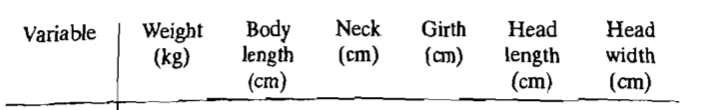

In [79]:

tempbon2=np.zeros( (p,2) )
for i in range(p):
  a=np.zeros(p)
  a[i]=1
  tempbon2[i]=ICbon(0.05, a, xbar, S)

a=np.array([0,0,0,0,-1,1])
print('\nIC bon t:\n ', tempbon2)  
print( ICt( 0.05/m, a , xbar, S )   ) # Ancho cabeza- Largo cabeza

#Preguntas usando Bonferroni:

# 1) en promedio, el ancho de la cabeza es igual al largo? NO
# 2) el peso se puede considerar mayor a 90? si se podria
# 3) la longitud de cuello en promedio es 45? No



IC bon t:
  [[ 75.13680866 115.90319134]
 [154.79758362 173.96241638]
 [ 50.91471352  60.46528648]
 [ 85.61731315 101.16268685]
 [ 16.85501936  19.10498064]
 [ 29.48557095  32.77442905]]
(12.487565326069682, 13.812434673930316)
